<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Copy_of_LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

    100% |████████████████████████████████| 215kB 21.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1.describe().T

,count,mean,std,min,25%,50%,75%,max
treatmenta,2.0,9.500000,9.192388,3.0,6.25,9.5,12.75,16.0
treatmentb,3.0,4.666667,5.507571,1.0,1.50,2.0,6.50,11.0


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [0]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [0]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
table1.reset_index().melt()

,variable,value
0,index,John Smith
1,index,Jane Doe
2,index,Mary Johnson
3,treatmenta,NaN
4,treatmenta,16
5,treatmenta,3
6,treatmentb,2
7,treatmentb,11
8,treatmentb,1


In [0]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index':'name',
    'variable':'trt',
     'value':'result'})

tidy['trt'] = tidy['trt'].str.replace('treatment','')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Table 2 --> Tidy

In [51]:
table2.columns.tolist(), table2.index.tolist()

(['John Smith', 'Jane Doe', 'Mary Johnson'], ['treatmenta', 'treatmentb'])

In [57]:
tidy2 = table2.reset_index().melt(id_vars='index')
tidy2.head()
tidy2['index'] = tidy2['index'].str.replace('treatment','')
tidy2.columns = ['trt','name','result']
tidy2 = tidy2[['name','trt','result']]
tidy2

,name,trt,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [0]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [58]:
tidy2.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


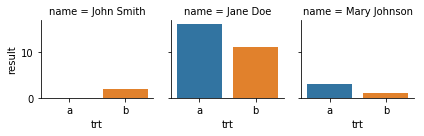

In [59]:
##seaborn example
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-27 17:19:45--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.111.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.111.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  80.9MB/s    in 2.4s    

2019-03-27 17:19:47 (80.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [0]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

In [0]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (33819106, 4), (3421083, 7), (33819106, 4))

In [0]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:


condition = ((merged['product_name']=='Half Baked Frozen Yogurt') |
             (merged['product_name']=='Half And Half Ultra Pasteurized'))



product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

In [0]:
subset.sample(n=5)

,product_id,product_name,order_id,order_hour_of_day
29198454,9292,Half And Half Ultra Pasteurized,2464031,8
25401376,30668,Half Baked Frozen Yogurt,1819816,21
29197295,9292,Half And Half Ultra Pasteurized,1609752,14
16502186,30668,Half Baked Frozen Yogurt,2915476,17
29197104,9292,Half And Half Ultra Pasteurized,1434106,12


## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

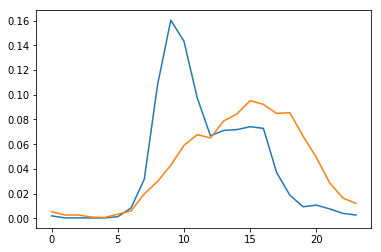

In [0]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())
(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

### 2. crosstab

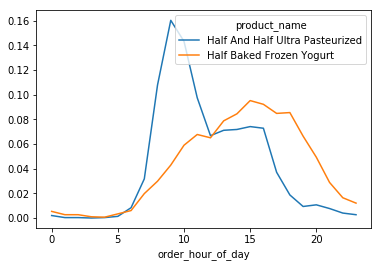

In [0]:
pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], 
            normalize='columns').plot()

### 3. pivot_table

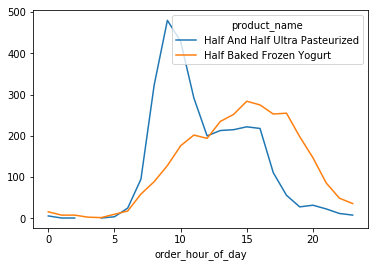

In [0]:
subset.pivot_table(index='order_hour_of_day', 
                   columns='product_name', 
                   values='order_id', 
                   aggfunc=len).plot();

### 4. melt

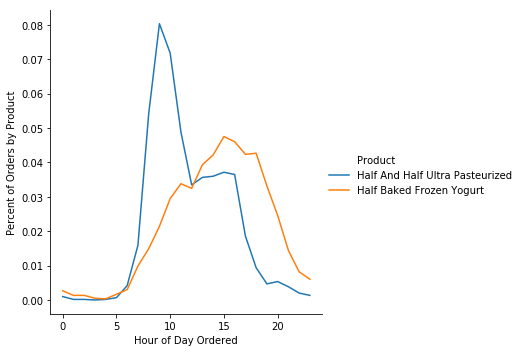

In [50]:
table = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

melted = (table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
 .rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }))

sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [61]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [62]:
flights.pivot_table(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [63]:
# for option 1 we need the orders df as that as hour of the day
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
order_products_prior = pd.read_csv('order_products__prior.csv')

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')

In [67]:
#stealing my code from last night
order_prior_train = pd.concat([order_products_prior,order_products__train])
order_prior_train.head()
df_new = pd.merge(order_prior_train,products)
orders_cut = orders[['order_id','order_hour_of_day']].copy()
df_cut = df_new[['order_id','product_name']].copy()
df_cut.head()

,order_id,product_name
0,2,Organic Egg Whites
1,26,Organic Egg Whites
2,120,Organic Egg Whites
3,327,Organic Egg Whites
4,390,Organic Egg Whites


In [0]:
dont_crash = pd.merge(df_cut,orders_cut)

In [69]:
dont_crash.head()

,order_id,product_name,order_hour_of_day
0,2,Organic Egg Whites,9
1,2,Michigan Organic Kale,9
2,2,Garlic Powder,9
3,2,Coconut Butter,9
4,2,Natural Sweetener,9


In [70]:
popprods = dont_crash['product_name'].value_counts()
popprods = popprods[popprods>2900]
popprods.index

Index(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
       'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk',
       ...
       'Vegetarian Refried Beans',
       'Oh My Yog! Pacific Coast Strawberry Trilayer Yogurt', 'Chives',
       'Stage 2 Sweet Potato Corn & Apple Baby Food',
       'Organic Free Range Grade A Large Brown Eggs',
       'Creamy Deluxe Macaroni Dinner Elbows & Four Cheese Sauce',
       'Stage 1 - Just Prunes', 'Whole Chia Seeds', 'Organic Spelt Tortillas',
       '3 lb Clementines'],
      dtype='object', length=2051)

In [71]:
prod_condition = dont_crash['product_name'].isin(list(popprods.index))
dc_filter = dont_crash[prod_condition]
dc_filter.head()

,order_id,product_name,order_hour_of_day
0,2,Organic Egg Whites,9
1,2,Michigan Organic Kale,9
2,2,Garlic Powder,9
5,2,Carrots,9
9,26,Organic Egg Whites,16


In [0]:
ordermeans = dc_filter.groupby(['product_name']).mean().copy()

In [74]:
#ok now we can get teh top 25 early foods and top 25 late foods
latelist = ordermeans.sort_values(by=['order_hour_of_day'], ascending=False).index[:25]
latelist

Index(['Half Baked Frozen Yogurt', 'The Tonight Dough™ Ice Cream',
       'Americone Dream® Ice Cream', 'Half Baked® Ice Cream',
       'Phish Food® Ice Cream', 'Milk and Cookies Ice Cream',
       'Sicilian Pistachio', 'Chocolate Peanut Butter Cup Gelato',
       'Birthday Cake Light Ice Cream', 'Cherry Garcia Ice Cream',
       'Strawberry Ice Cream', 'Vanilla Bean Light Ice Cream',
       'Coffee Ice Cream', 'Roman Raspberry Sorbetto',
       'Mediterranean Mint Gelato', 'Caramel Cookie Crunch Gelato',
       'Chocolate Chip Cookie Dough Ice Cream', 'Mint Chip',
       'Coconut Almond Minis Frozen Dessert Bars',
       'Mint Chocolate Chip Ice Cream', 'Chocolate Peanut Butter Ice Cream',
       'Vanilla Milk Chocolate Almond Ice Cream Bars',
       'Sea Salt Caramel Gelato', 'Vanilla Bean Ice Cream',
       'Rising Crust Pepperoni Pizza'],
      dtype='object', name='product_name')

In [75]:
earlylist = ordermeans.sort_values(by=['order_hour_of_day'], ascending=False).index[-25:]
earlylist

Index(['Cinnamon Brown Sugar Breakfast Biscuits',
       'Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage',
       'French Vanilla Coffee Creamer', 'Half And Half Cream', 'Clementines',
       'Original Almondmilk', 'with Crispy Almonds Cereal', 'Pink Lady Apples',
       'Extra Fancy Unsalted Mixed Nuts', '0% Greek Strained Yogurt',
       'Milk Chocolate Almonds', 'Popcorn', 'Cheez-It Cheddar Cracker',
       'Original Beef Jerky', 'Crunchy Oats 'n Honey Granola Bars',
       'Zero Calorie Cola', 'Dry Roasted Almonds',
       'Cheez-It Baked Snack Crackers', 'Apples',
       'Original Rice Krispies Treats', 'Trail Mix',
       'Nutri Grain Bars Multi Pack', 'Pub Mix',
       'Sweet & Salty Nut Granola Bars Peanut',
       'Half And Half Ultra Pasteurized'],
      dtype='object', name='product_name')

In [80]:
#now we can make a dont_crash_early and a dont_crash_late
dont_crash_early = dont_crash[dont_crash['product_name'].isin(earlylist)].copy()
dont_crash_early = dont_crash_early[['product_name','order_hour_of_day']]
dont_crash_early.head()

,product_name,order_hour_of_day
3521,with Crispy Almonds Cereal,22
3525,Crunchy Oats 'n Honey Granola Bars,22
3529,Dry Roasted Almonds,22
3530,Pub Mix,22
4688,Apples,18


In [79]:
dont_crash_late = dont_crash[dont_crash['product_name'].isin(latelist)].copy()
dont_crash_late = dont_crash_late[['product_name','order_hour_of_day']]
dont_crash_late.head()

,product_name,order_hour_of_day
318,Cherry Garcia Ice Cream,18
398,Chocolate Peanut Butter Cup Gelato,17
515,Mint Chip,1
517,Strawberry Ice Cream,1
529,Vanilla Bean Light Ice Cream,11


In [84]:
#adding some ones!
dont_crash_early['ones']=1
dont_crash_late['ones']=1
dont_crash_late.head()

,product_name,order_hour_of_day,ones
318,Cherry Garcia Ice Cream,18,1
398,Chocolate Peanut Butter Cup Gelato,17,1
515,Mint Chip,1,1
517,Strawberry Ice Cream,1,1
529,Vanilla Bean Light Ice Cream,11,1


In [0]:
#we are going to group these by the product_name and do a value counts
dont_crash_early['product_name'].value_counts()

In [107]:
#make a pivot - i only realized later i could jus tnormalize this stuff
early_piv = dont_crash_early.pivot_table(index='product_name', columns='order_hour_of_day',values='ones',aggfunc=np.sum)
col_list = early_piv.columns
early_piv['total'] = early_piv[col_list].sum(axis=1)
early_piv = early_piv.div(early_piv.total, axis='index') * 100
early_piv = early_piv.drop(['total'], axis=1)
early_piv = early_piv.reindex(earlylist)
early_piv = early_piv.reindex(index=early_piv.index[::-1])
early_piv.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
product_name,,,,,,,,,,,,,,,,,,,,,
Half And Half Ultra Pasteurized,0.200334,0.033389,0.033389,NaN,0.033389,0.133556,0.834725,3.171953,10.784641,16.026711,...,7.178631,7.412354,7.278798,3.706177,1.869783,0.934891,1.068447,0.767947,0.400668,0.267112
Sweet & Salty Nut Granola Bars Peanut,0.230521,0.115260,0.138313,0.046104,0.115260,0.230521,0.760719,2.973721,8.068234,14.015675,...,8.483172,7.584140,6.039650,3.434763,1.221761,0.899032,1.083449,0.806823,0.645459,0.714615
Pub Mix,0.446528,0.111632,0.089306,0.044653,0.111632,0.111632,0.513507,1.763787,5.626256,14.690779,...,7.747265,7.702612,6.273722,3.750837,1.518196,0.826077,0.870730,0.759098,0.669792,0.714445
Nutri Grain Bars Multi Pack,0.270270,0.216216,0.189189,0.054054,0.027027,0.216216,0.621622,2.243243,6.891892,14.405405,...,7.621622,7.162162,6.324324,3.594595,1.675676,1.297297,1.135135,1.162162,0.783784,0.702703
Trail Mix,0.277756,0.190461,0.047615,0.047615,0.095231,0.166653,0.372986,1.991905,7.031188,14.760733,...,7.912070,7.967622,6.650266,3.904452,1.706214,1.007857,0.849139,0.944369,0.817395,0.492024


In [108]:
late_piv = dont_crash_late.pivot_table(index='product_name', columns='order_hour_of_day',values='ones',aggfunc=np.sum)
#col_list = early_piv.columns
late_piv['total'] = late_piv[col_list].sum(axis=1)
late_piv = late_piv.div(late_piv.total, axis='index') * 100
late_piv = late_piv.drop(['total'], axis=1)
late_piv = late_piv.reindex(latelist)
late_piv.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
product_name,,,,,,,,,,,,,,,,,,,,,
Half Baked Frozen Yogurt,0.536373,0.268186,0.268186,0.100570,0.067047,0.335233,0.603419,1.977875,2.983574,4.290982,...,8.447871,9.520617,9.218907,8.481395,8.548441,6.637613,4.927925,2.883004,1.642642,1.206839
The Tonight Dough™ Ice Cream,0.573797,0.255021,0.095633,0.286898,0.095633,0.223143,0.828817,1.657635,2.996493,4.717883,...,7.554989,9.690787,9.212624,9.595155,9.690787,8.065030,4.175964,2.231431,1.211348,0.701307
Americone Dream® Ice Cream,0.527377,0.418799,0.139600,0.077555,0.108578,0.232666,0.651466,1.938886,3.396929,4.917016,...,8.577633,8.763766,10.020164,8.794788,8.174345,6.886924,4.001861,2.528308,1.613153,1.023732
Half Baked® Ice Cream,0.707168,0.401800,0.208936,0.080360,0.144648,0.160720,0.466088,1.446480,3.262617,4.693025,...,8.727097,9.161041,9.900354,9.386050,8.791385,6.252009,3.905497,2.217936,1.446480,1.060752
Phish Food® Ice Cream,0.566572,0.188857,0.062952,0.094429,0.157381,0.283286,0.598048,1.857098,3.462386,5.193579,...,8.624489,8.309726,9.631728,9.159585,8.404155,6.452628,4.186339,2.581051,1.322002,1.038716


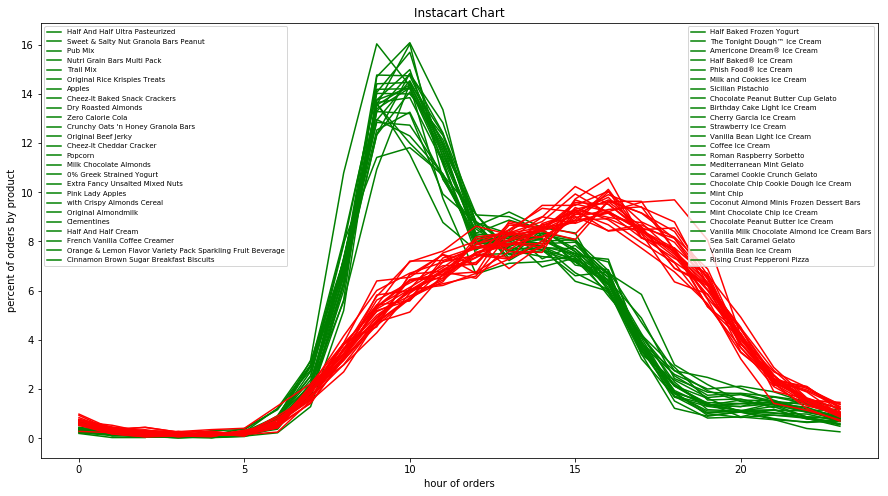

In [239]:
#i can't get the second legend to point properly to the late dataset

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ep = early_piv.T.plot(ax = ax,color='green')
lp = late_piv.T.plot(ax = ax,color='red')


plt.ylabel('percent of orders by product')
plt.xlabel('hour of orders')
plt.title('Instacart Chart')

lp_leg = lp.legend(latelist,loc="upper right",prop={'size': 7})
ep_leg = ep.legend((list(earlylist))[::-1],loc="upper left",prop={'size': 7})


ax.figure.set_size_inches(15, 8)
ax.add_artist(lp_leg)


plt.show()

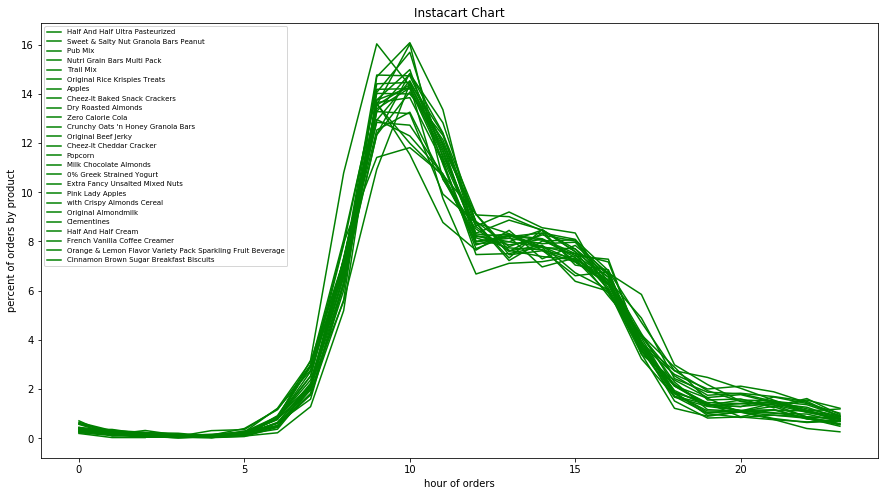

In [234]:
#try plotting separately

fig1, ax1 = plt.subplots()

ep1 = early_piv.T.plot(ax = ax1,color='green')

plt.ylabel('percent of orders by product')
plt.xlabel('hour of orders')
plt.title('Instacart Chart')

ep_leg1 = ep1.legend((list(earlylist))[::-1],loc="upper left",prop={'size': 7})

ax1.figure.set_size_inches(15, 8)

plt.show()

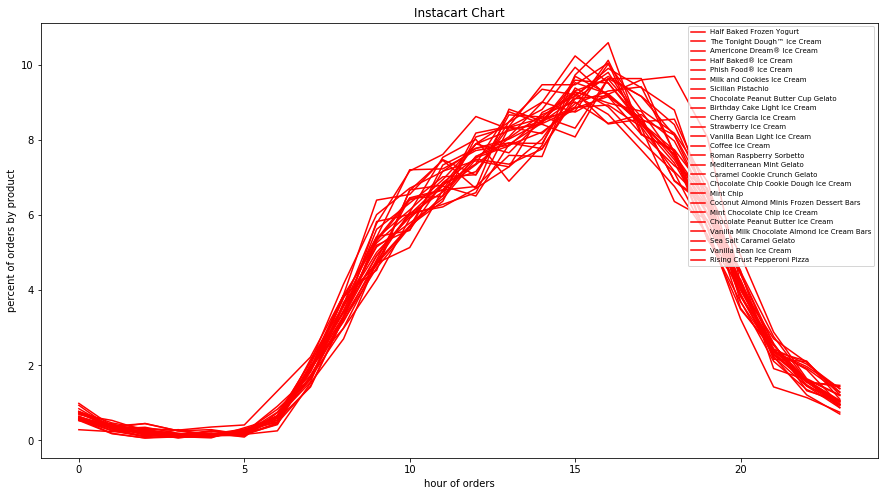

In [235]:
fig2, ax2 = plt.subplots()

lp2 = late_piv.T.plot(ax = ax2,color='red')

plt.ylabel('percent of orders by product')
plt.xlabel('hour of orders')
plt.title('Instacart Chart')

lp_leg2 = lp2.legend(latelist,loc="upper right",prop={'size': 7})

ax2.figure.set_size_inches(15, 8)

plt.show()